In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [12]:

df = pd.read_csv('Indian Liver Patient Dataset.csv')

In [13]:
df.columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A_G_Ratio', 'Selector']
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['A_G_Ratio'] = df['A_G_Ratio'].fillna(df['A_G_Ratio'].mean())

In [14]:
X = df.drop('Selector', axis=1)
y = df['Selector'] # 1 = disease, 2 = healthy

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

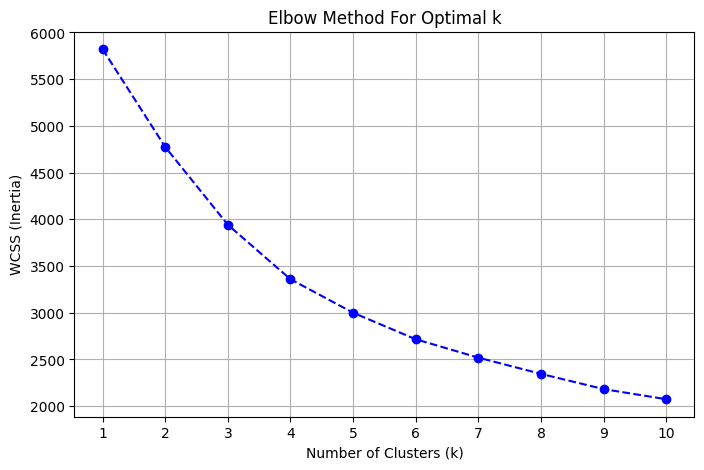

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, 'bo--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

In [ ]:
#k=2

In [18]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [19]:
df['Cluster'] = clusters
df['Actual'] = df['Selector'].map({1: 1, 2: 0})  # 1 = disease, 0 = no disease

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

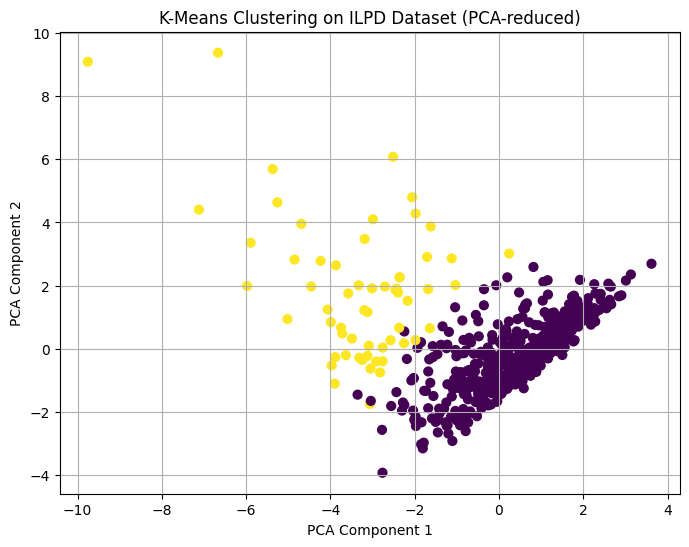

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=40)
plt.title("K-Means Clustering on ILPD Dataset (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [22]:
confusion = pd.crosstab(df['Cluster'], df['Actual'], 
                        rownames=['Cluster'], colnames=['Actual Condition (1 = Disease)'])
print("Cluster vs Actual Condition:\n")
print(confusion)

Cluster vs Actual Condition:

Actual Condition (1 = Disease)    0    1
Cluster                                 
0                               166  356
1                                 1   59
